# Figure1

Rahul Samrat

## Figure 1: Overview of Soil Lipid Categories & Classes in the ClimgGrass Experiment

This Scirpt provide the scipt for plotting the Stacker bar plot of
distribtuion and count of lipid compounds.

## Load necessary libraries

In [ ]:
library(ggplot2)
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

## Load the data

In [ ]:
file_path <- "Figure1-data.xlsx"  # Update this with the actual file path
df <- read_excel(file_path)

## Prepare the data for plotting Stacked bar plot

In [ ]:
subclass_counts <- df %>%
  count(Class, Subclass) %>%
  arrange(Class, desc(n))

# Summarize subclass counts
total_subclass_counts <- subclass_counts %>%
  group_by(Class, Subclass) %>%
  summarise(TotalCount = sum(n)) %>%
  arrange(Class, desc(TotalCount))

`summarise()` has grouped output by 'Class'. You can override using the
`.groups` argument.

## Create the plot

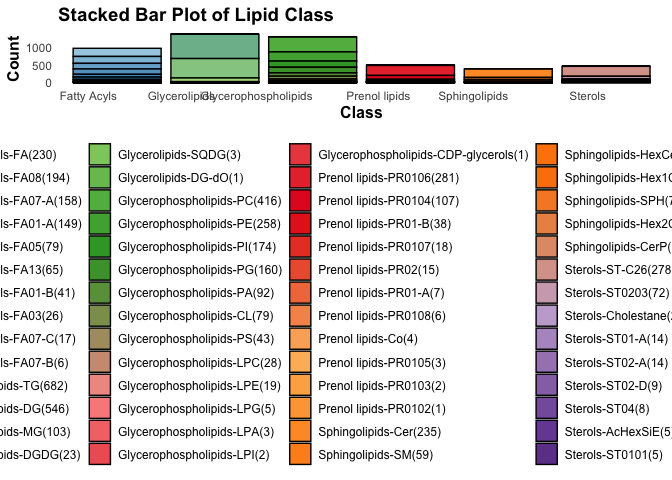

In [ ]:
p <- ggplot(df_long, aes(x = Class, y = Count, fill = Subclass)) +
  geom_bar(stat = "identity", color = "black") +
  labs(title = "Stacked Bar Plot of Lipid Class",
       x = "Class", y = "Count") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 14, face = "bold"),
    axis.title.x = element_text(size = 12, face = "bold"),
    axis.title.y = element_text(size = 12, face = "bold"),
    axis.text.x = element_text(angle = 0, hjust = 1),
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(),
    legend.position = "bottom",
    legend.title = element_text(size = 10),
    legend.text = element_text(size = 8),
    legend.box = "vertical"
  ) +
  guides(fill = guide_legend(title = "Subclass", ncol = 5, label.theme = element_text(size = 9))) +
  scale_fill_manual(values = setNames(colors, unique(df_long$Subclass)),
                    labels = setNames(total_subclass_counts$Label, total_subclass_counts$Subclass))
# Save the plot as an SVG file
ggsave("stacked_bar_plot.pdf", plot = p, width = 12, height = 11.69, units = "in")
print(p)

## Lipid Annotation Comparision Library-Search v/s Prediction-based approach

In [ ]:
# Load necessary libraries
library(ggplot2)
library(readxl)

# Load the data
file_path <- "Figure1-data.xlsx"
data <- read_excel(file_path, sheet = "Sheet1")

# Create columns to indicate presence of value in 'LipidSearch' and 'SiriusID'
data$LipidSearch_Present <- ifelse(!is.na(data$LipidSearch), 1, 0)
data$SiriusID_Present <- ifelse(!is.na(data$SiriusID), 1, 0)

# Summarize the data by 'Class'
summarized_data <- aggregate(cbind(LipidSearch_Present, SiriusID_Present) ~ Class, data, sum)

# Melt the data for ggplot2
library(reshape2)


Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths

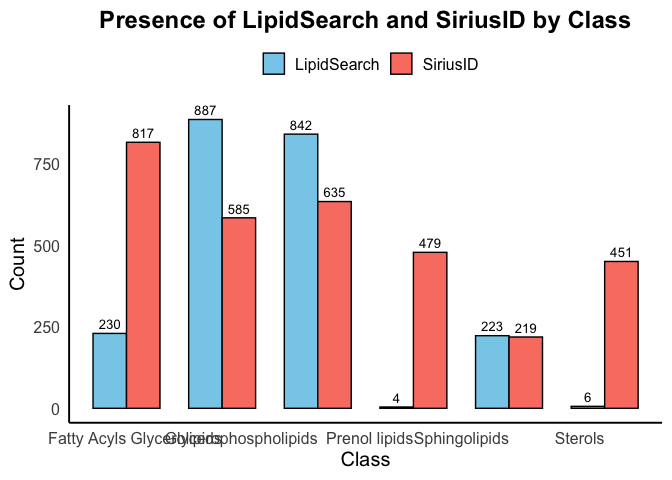

In [ ]:
# Create the plot
p <- ggplot(melted_data, aes(x = Class, y = value, fill = variable)) +
  geom_bar(stat = "identity", color = "black", position = position_dodge(), width = 0.7) +
  geom_text(aes(label = value), vjust = -0.5, position = position_dodge(0.7), size = 3.5) +
  scale_fill_manual(values = c("skyblue", "salmon"), labels = c("LipidSearch", "SiriusID")) +
  labs(title = "Presence of LipidSearch and SiriusID by Class",
       x = "Class",
       y = "Count",
       fill = "") +
  theme_minimal(base_size = 15) +
  theme(
    axis.text.x = element_text(angle = 0, hjust = 1, vjust = 1),
    plot.title = element_text(hjust = 0.5, face = "bold"),
    legend.position = "top",
    panel.background = element_blank(),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.line = element_line(colour = "black")
  )
print(p)

Loading required package: grid

Loading required package: futile.logger

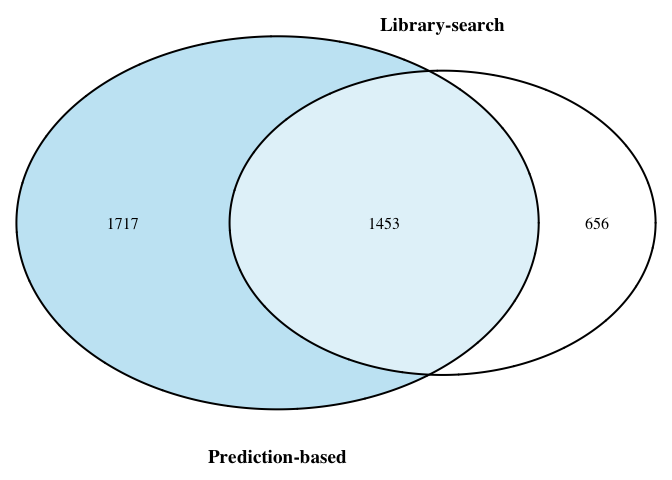

quartz_off_screen 
                2 

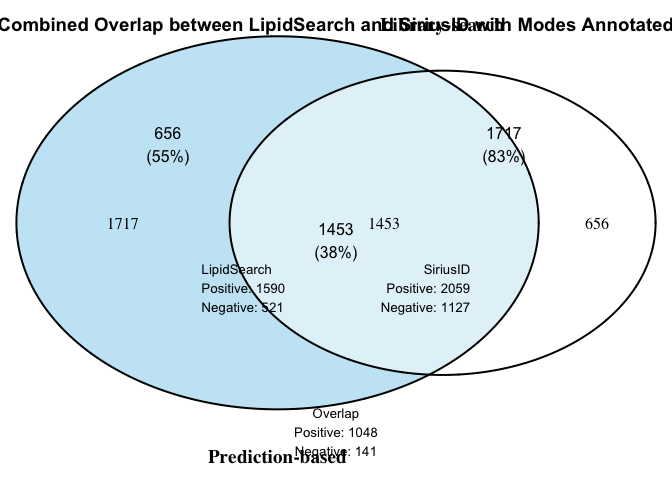

In [ ]:
library(readxl)
library(VennDiagram)